In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
column_names =["area", "perimeter", "compactness", "length of kernel", "width of kernel", "asymmetry coefficient", 
               "length of kernel groove", "class" ]

In [4]:
df = pd.read_csv("seeds.csv", header =None)
df.columns = column_names
df.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
name = []
for i in df['class']:
    if i == 1:
        name.append("kama wheat")
    elif i == 2:
        name.append("rosa wheat")
    elif i == 3:
        name.append("canadian wheat")
        

In [6]:
df['name'] = name
df.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class,name
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,kama wheat


In [7]:
df.to_csv("grains.csv", index= False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   class                    210 non-null    int64  
 8   name                     210 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 14.9+ KB


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(["class", "name"], axis = 1)

In [9]:
y = df["name"]
y

0          kama wheat
1          kama wheat
2          kama wheat
3          kama wheat
4          kama wheat
            ...      
205    canadian wheat
206    canadian wheat
207    canadian wheat
208    canadian wheat
209    canadian wheat
Name: name, Length: 210, dtype: object

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
from sklearn.cluster import KMeans

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2719.8524101779526
1011.7123453151188
587.3186115940429
471.027145682211
386.04211396581354


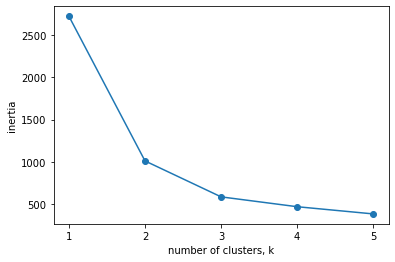

In [12]:
ks = range(1, 6)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(X)
    print(model.inertia_)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


We can observe from the inertia plot that 3 is a good number of clusters for the grain data. Now, we'll cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

In [13]:
new_model = KMeans(n_clusters=3)

In [14]:
labels = new_model.fit_predict(X)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
# Create a DataFrame with labels and varieties as columns: df
new_df = pd.DataFrame({'labels': labels, 'varieties': y})
new_df

,labels,varieties
0,0,kama wheat
1,0,kama wheat
2,0,kama wheat
3,0,kama wheat
4,0,kama wheat
...,...,...
205,2,canadian wheat
206,2,canadian wheat
207,2,canadian wheat
208,2,canadian wheat


In [16]:
# Create crosstab: ct
ct = pd.crosstab(new_df["labels"], new_df["varieties"])
ct

varieties,canadian wheat,kama wheat,rosa wheat
labels,,,
0,2,60,10
1,0,1,60
2,68,9,0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
new_model2 = KMeans(n_clusters=3)

In [20]:
from sklearn.pipeline import make_pipeline

In [21]:
pipeline = make_pipeline(scaler, new_model2)

In [22]:
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [23]:
labels2 = pipeline.predict(X)
labels2

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
# Create a DataFrame with labels and varieties as columns: df
new_df2 = pd.DataFrame({'labels': labels2, 'varieties': y})
new_df2.head()

,labels,varieties
0,1,kama wheat
1,1,kama wheat
2,1,kama wheat
3,1,kama wheat
4,1,kama wheat


In [25]:
# Create crosstab: ct
ct2 = pd.crosstab(new_df2["labels"], new_df2["varieties"])
ct2 ## with standardization

varieties,canadian wheat,kama wheat,rosa wheat
labels,,,
0,0,2,65
1,4,62,5
2,66,6,0


In [26]:
ct ## without standardization

varieties,canadian wheat,kama wheat,rosa wheat
labels,,,
0,2,60,10
1,0,1,60
2,68,9,0


### Hierarchical Clustering

In [27]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

In [28]:
scaled_X = scaler.fit_transform(X)

In [29]:
# Calculate the linkage: mergings
mergings = linkage(scaled_X, method = 'complete')
mergings

array([[1.48000000e+02, 1.98000000e+02, 1.93504972e-01, 2.00000000e+00],
       [1.30000000e+01, 1.40000000e+01, 2.10838343e-01, 2.00000000e+00],
       [1.49000000e+02, 1.74000000e+02, 2.12567098e-01, 2.00000000e+00],
       [1.23000000e+02, 1.30000000e+02, 2.19082597e-01, 2.00000000e+00],
       [4.00000000e+01, 4.10000000e+01, 2.39904413e-01, 2.00000000e+00],
       [1.10000000e+01, 4.50000000e+01, 2.58887422e-01, 2.00000000e+00],
       [1.73000000e+02, 1.76000000e+02, 2.71067313e-01, 2.00000000e+00],
       [4.90000000e+01, 5.50000000e+01, 2.86861619e-01, 2.00000000e+00],
       [5.00000000e+00, 7.00000000e+00, 2.90557562e-01, 2.00000000e+00],
       [1.01000000e+02, 1.27000000e+02, 2.91245011e-01, 2.00000000e+00],
       [1.47000000e+02, 1.94000000e+02, 2.96325619e-01, 2.00000000e+00],
       [7.10000000e+01, 7.50000000e+01, 3.18522663e-01, 2.00000000e+00],
       [1.07000000e+02, 1.36000000e+02, 3.34441266e-01, 2.00000000e+00],
       [1.91000000e+02, 2.06000000e+02, 3.36662931e

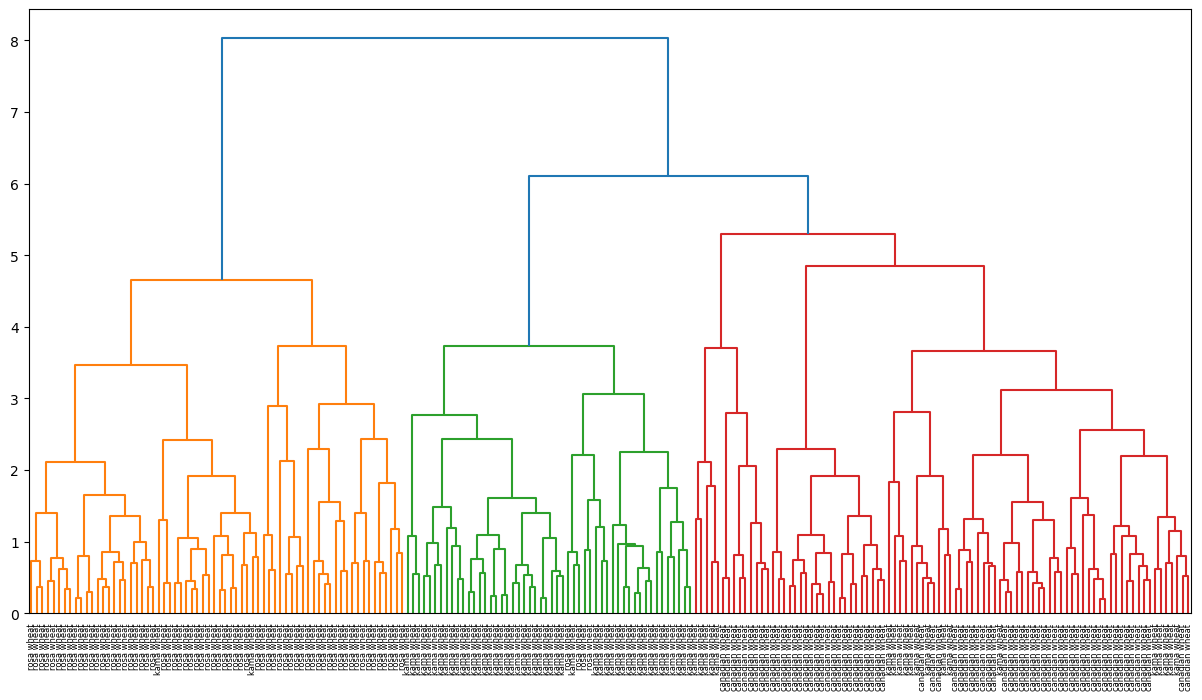

In [30]:
# Plot the dendrogram, using varieties as labels
plt.figure(figsize = (15,8), dpi= 100)
dendrogram(mergings,labels = list(y),leaf_rotation= 90,leaf_font_size=6)
plt.show()

In [31]:
from scipy.cluster.hierarchy import fcluster

In [32]:
scaleX = scaler.fit_transform(X)

In [33]:
# Calculate the linkage: mergings
mergings = linkage(scaleX, method = 'complete')
mergings

array([[1.48000000e+02, 1.98000000e+02, 1.93504972e-01, 2.00000000e+00],
       [1.30000000e+01, 1.40000000e+01, 2.10838343e-01, 2.00000000e+00],
       [1.49000000e+02, 1.74000000e+02, 2.12567098e-01, 2.00000000e+00],
       [1.23000000e+02, 1.30000000e+02, 2.19082597e-01, 2.00000000e+00],
       [4.00000000e+01, 4.10000000e+01, 2.39904413e-01, 2.00000000e+00],
       [1.10000000e+01, 4.50000000e+01, 2.58887422e-01, 2.00000000e+00],
       [1.73000000e+02, 1.76000000e+02, 2.71067313e-01, 2.00000000e+00],
       [4.90000000e+01, 5.50000000e+01, 2.86861619e-01, 2.00000000e+00],
       [5.00000000e+00, 7.00000000e+00, 2.90557562e-01, 2.00000000e+00],
       [1.01000000e+02, 1.27000000e+02, 2.91245011e-01, 2.00000000e+00],
       [1.47000000e+02, 1.94000000e+02, 2.96325619e-01, 2.00000000e+00],
       [7.10000000e+01, 7.50000000e+01, 3.18522663e-01, 2.00000000e+00],
       [1.07000000e+02, 1.36000000e+02, 3.34441266e-01, 2.00000000e+00],
       [1.91000000e+02, 2.06000000e+02, 3.36662931e

In [34]:
# Use fcluster to extract labels: labels
new_labels = fcluster(mergings, 6, criterion = "distance")
new_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 1,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [36]:
# Create a DataFrame with labels and varieties as columns: df
h_df = pd.DataFrame({'labels': new_labels, 'varieties': y})
h_df

,labels,varieties
0,2,kama wheat
1,2,kama wheat
2,2,kama wheat
3,2,kama wheat
4,2,kama wheat
...,...,...
205,3,canadian wheat
206,3,canadian wheat
207,3,canadian wheat
208,3,canadian wheat


In [37]:
# Create crosstab: ct
h_ct = pd.crosstab(h_df['labels'], h_df['varieties'])
h_ct

varieties,canadian wheat,kama wheat,rosa wheat
labels,,,
1,0,2,66
2,0,48,4
3,70,20,0


In [38]:
ct2

varieties,canadian wheat,kama wheat,rosa wheat
labels,,,
0,0,2,65
1,4,62,5
2,66,6,0


In [39]:
ct

varieties,canadian wheat,kama wheat,rosa wheat
labels,,,
0,2,60,10
1,0,1,60
2,68,9,0


### t-SNE(t-distributed stochastic neighbor embedding)

In [40]:
# Import TSNE
from sklearn.manifold import TSNE

In [41]:
# Create a TSNE instance: model
model_T = TSNE(learning_rate = 200)

In [42]:
# Apply fit_transform to samples: tsne_features
tsne_features = model_T.fit_transform(X)

In [43]:
tsne_features

array([[  0.39761212,   5.1177998 ],
       [  3.1965008 ,   5.7453637 ],
       [  1.8077834 ,   1.383612  ],
       [  3.3753319 ,   0.734169  ],
       [  0.750144  ,   7.3013067 ],
       [  1.8994462 ,   2.0560606 ],
       [ -1.4634538 ,   1.477286  ],
       [  2.158416  ,   0.7330794 ],
       [ -1.5799524 ,   7.9189773 ],
       [ -0.82155484,   7.592185  ],
       [ -4.961076  ,   3.3392282 ],
       [  3.8088138 ,   2.5563798 ],
       [ -0.61621344,  -1.256466  ],
       [  1.4050142 ,  -0.62632996],
       [  2.113391  ,  -0.4227109 ],
       [ -2.1682198 ,  -0.04707859],
       [  1.9933956 , -11.74467   ],
       [  1.2773613 ,   6.4941516 ],
       [  2.7707825 ,   3.4614854 ],
       [  4.5323987 ,  -8.237615  ],
       [  0.48297653,   0.64178693],
       [  1.4355297 ,   1.0342557 ],
       [  1.9630529 ,   7.3067565 ],
       [  7.8339515 ,  -2.1563125 ],
       [  1.9694093 ,   5.1568456 ],
       [  1.2534349 ,   7.739467  ],
       [  4.0075917 ,  -4.5969586 ],
 

In [48]:
# Select the 0th feature: xs
xs = tsne_features[:,0]
#xs

In [49]:
# Select the 1st feature: ys
ys = tsne_features[:,1]
#ys

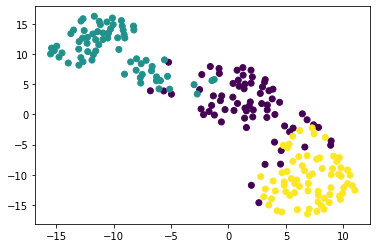

In [50]:
# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys, c = df["class"])
plt.show()